## - 일간지 신문 사설을 크롤링 해서 단어를 정리하고 단어간 네트워크 그래프를 그리기

In [21]:
# 크롤링에 필요한 모듈
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter
from konlpy.tag import Okt

import matplotlib
import matplotlib.font_manager as fm

font_location = 'C:/Windows/Fonts/H2GPRM.TTF' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [26]:
# 신문에 내용 읽어오기
driver = webdriver.Chrome()
url = "https://www.hankookilbo.com/News/Read/A2023102514530003194"
driver.get(url)

time.sleep(3)
ps = driver.find_elements(By.XPATH, '/html/body/div[2]/div[1]/div[4]/div/div[1]/p')

print('신문을 읽어 왔습니다.')

The chromedriver version (117.0.5938.62) detected in PATH at D:\Main) Central Competency Development Institute\5. Python(AM)(33Day-Day)\2. work file\chromedriver.exe might not be compatible with the detected chrome version (118.0.5993.89); currently, chromedriver 118.0.5993.70 is recommended for chrome 118.*, so it is advised to delete the driver in PATH and retry


신문을 읽어 왔습니다.


In [27]:
# 필요없는 특수문자 및 기호 제거
conts = ""
for row in ps:
    conts += row.text
# print(conts)
conts = conts.replace(',', '')
conts = conts.replace('.', '')
conts = conts.replace('‘', '')
conts = conts.replace('’', '')
conts = conts.replace('”', '')
conts = conts.replace('(', '')
conts = conts.replace(')', '')
driver.close()
conts

'정부가 오늘 입법예고하는 한국형 제시카법은 고위험 성범죄자를 별도 시설에 의무 거주하도록 하는 내용을 담고 있다 조두순 김근식 박병화 등 악질 성범죄자 출소 때마다 해당 지역 주민들이 불안에 떠는 것을 차단하기 위해서다 취지는 좋은데 잘될 수 있을지 걱정이 크다 풀어야 할 숙제가 간단치 않아 보여서다정부는 당초 학교 유치원 등으로부터 500m 이내 거주를 제한하는 방식을 검토했다 미국의 제시카법이 이런 방식인데 국토가 좁은 우리나라는 거주 가능 지역이 많지 않다 그래서 택한 방식이 출소 후 거주지를 국가운영시설로 제한하는 방식이다 한 곳에 모아둘 수 있으면 관리는 한결 쉬울 것이다최대 난제는 시설이 들어설 지역을 찾는 일이다 13세 미만 아동 대상 또는 3회 이상 성범죄자가 대상인데 요건 충족자가 지난해 말 기준 352명이라고 한다 소급 적용을 하는 데다 해마다 60~70명씩 출소 예정이라니 준비기간을 거쳐 법이 시행되는 시점에는 500명이 넘을 것이다 광역자치단체별로 시설을 만들려면 지자체마다 엄청난 내홍을 겪을 수밖에 없다 전자발찌를 찬 성범죄자가 수십 명씩 버젓이 활보하는 시설을 어느 지역 주민이 흔쾌히 받아들이겠는가 기존 지역이기주의와는 차원이 다른 문제일 것이다과거 위헌 결정이 난 보호감호제재범 위험 출소자 시설 격리와 유사해 이중 처벌 지적도 만만찮다 위헌 논란을 비껴가려면 인권침해적 요소를 대폭 제거해야 할 텐데 그만큼 위험은 커질 것이다 보호관찰관이 1대 1로 관리를 하겠다지만 과하다 싶을 정도의 인력 배치가 있어야 조금이나마 주민 불안을 덜어낼 것이다 거주시설 제한에 그치지 않고 실효성 있는 심리 치료가 중요한 것은 물론이다한동훈 법무부 장관은 거주지 제한 대상을 “교도소나 구치소에 15년 있었다고 과연 달라질까 우려되는 사람들이라고 표현했다 국민들의 생각도 크게 다르지 않을 것이다 이참에 법원도 이런 논란 많은 이중 처벌 최소화를 위해 양형규정을 손보는 방안을 진지하게 논의했으면 한다'

In [28]:
words = conts.split(' ')
nodes = set(words) # 중복제거
nodes = list(nodes) # 리스트로 생성
#nodes

edges = [] # 첫번째와 두번째를 묶어서 저장
for i in range(len(words)-1):
    edges.append((words[i], words[i+1]))
edges    

[('정부가', '오늘'),
 ('오늘', '입법예고하는'),
 ('입법예고하는', '한국형'),
 ('한국형', '제시카법은'),
 ('제시카법은', '고위험'),
 ('고위험', '성범죄자를'),
 ('성범죄자를', '별도'),
 ('별도', '시설에'),
 ('시설에', '의무'),
 ('의무', '거주하도록'),
 ('거주하도록', '하는'),
 ('하는', '내용을'),
 ('내용을', '담고'),
 ('담고', '있다'),
 ('있다', '조두순'),
 ('조두순', '김근식'),
 ('김근식', '박병화'),
 ('박병화', '등'),
 ('등', '악질'),
 ('악질', '성범죄자'),
 ('성범죄자', '출소'),
 ('출소', '때마다'),
 ('때마다', '해당'),
 ('해당', '지역'),
 ('지역', '주민들이'),
 ('주민들이', '불안에'),
 ('불안에', '떠는'),
 ('떠는', '것을'),
 ('것을', '차단하기'),
 ('차단하기', '위해서다'),
 ('위해서다', '취지는'),
 ('취지는', '좋은데'),
 ('좋은데', '잘될'),
 ('잘될', '수'),
 ('수', '있을지'),
 ('있을지', '걱정이'),
 ('걱정이', '크다'),
 ('크다', '풀어야'),
 ('풀어야', '할'),
 ('할', '숙제가'),
 ('숙제가', '간단치'),
 ('간단치', '않아'),
 ('않아', '보여서다정부는'),
 ('보여서다정부는', '당초'),
 ('당초', '학교'),
 ('학교', '유치원'),
 ('유치원', '등으로부터'),
 ('등으로부터', '500m'),
 ('500m', '이내'),
 ('이내', '거주를'),
 ('거주를', '제한하는'),
 ('제한하는', '방식을'),
 ('방식을', '검토했다'),
 ('검토했다', '미국의'),
 ('미국의', '제시카법이'),
 ('제시카법이', '이런'),
 ('이런', '방식인데'),
 ('방식인데', '국토가'),
 ('국토가', '좁은')

In [29]:
# 네트워크 그래프 그리기
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_location = 'c:/windows/fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family = font_name)

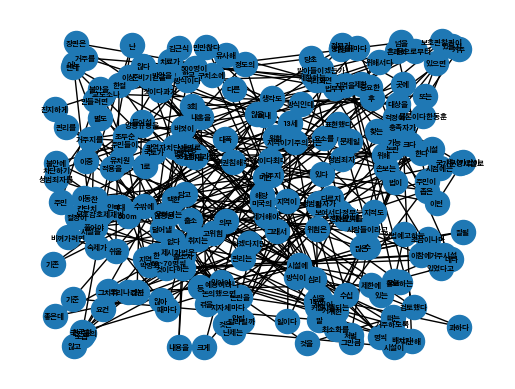

In [30]:
G = nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.random_layout(G)
nx.draw_networkx(G,pos, font_family=font_name,font_size=5)
plt.axis('off')
plt.show()